In [1]:
import DataHandlers
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
fc = DataHandlers.Forecast(data_source='csv')

In [3]:
start_date = fc.date_range.min()
end_date = fc.date_range.max()

Text(0.5, 1.0, 'Research Engineering: Forecast of capacity vs. demand')

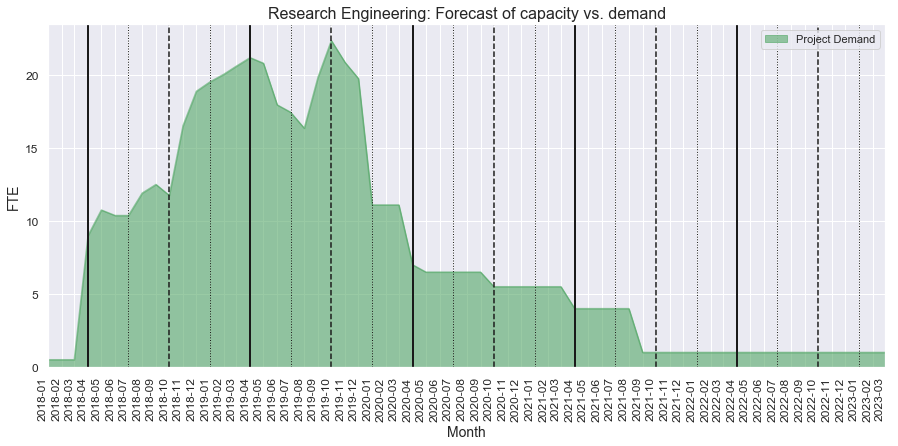

In [30]:
reqs = fc.project_reqs.sum(axis=1)
reqs = DataHandlers.select_date_range(reqs, start_date, end_date, drop_zero_cols=False)
reqs = reqs.resample('MS').mean()

# exclude hut 23, trac days etc. ???

capacity = pd.Series(index=reqs.index)


fig = plt.figure(figsize=(15,7))
ax = fig.gca()
reqs.plot.area(ax=ax, label='Project Demand', x_compat=True, rot=90, alpha=0.6, color='g')

xlim = ax.get_xlim()
ylim = ax.get_ylim()

quarters = pd.date_range(start=reqs.index.min(),end=reqs.index.max(),freq='QS')
for q in quarters:
    if q.month==4:
        linestyle = '-'
        linewidth = '2'
    
    elif q.month==7:
        linestyle = ':'
        linewidth = '1'        
    
    elif q.month==10:
        linestyle = '--'
        linewidth = '1.5'        
    
    elif q.month==1:
        linestyle = ':'
        linewidth = '1'
    
    ax.plot([q, q], ylim, linestyle=linestyle, linewidth=linewidth, color='k')

# format tick labels
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.set_xticklabels(reqs.index.strftime("%Y-%m").values, fontsize=12)
plt.yticks(fontsize=12)

ax.legend()
ax.set_ylabel('FTE', fontsize=14)
ax.set_xlabel('Month', fontsize=14)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('Research Engineering: Forecast of capacity vs. demand', fontsize=16);

In [31]:
reqs

2018-01-01     0.500000
2018-02-01     0.500000
2018-03-01     0.500000
2018-04-01     9.000000
2018-05-01    10.750000
2018-06-01    10.375000
2018-07-01    10.375000
2018-08-01    11.909091
2018-09-01    12.500000
2018-10-01    11.750000
2018-11-01    16.531818
2018-12-01    18.881579
2019-01-01    19.531818
2019-02-01    20.050000
2019-03-01    20.600000
2019-04-01    21.183000
2019-05-01    20.800000
2019-06-01    17.950000
2019-07-01    17.450000
2019-08-01    16.350000
2019-09-01    19.850000
2019-10-01    22.350000
2019-11-01    20.850000
2019-12-01    19.750000
2020-01-01    11.100000
2020-02-01    11.100000
2020-03-01    11.100000
2020-04-01     7.000000
2020-05-01     6.500000
2020-06-01     6.500000
                ...    
2020-10-01     5.500000
2020-11-01     5.500000
2020-12-01     5.500000
2021-01-01     5.500000
2021-02-01     5.500000
2021-03-01     5.500000
2021-04-01     4.000000
2021-05-01     4.000000
2021-06-01     4.000000
2021-07-01     4.000000
2021-08-01     4